In [16]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("car")
library(dplyr)
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [6]:
train<-readRDS("/content/optdigits_trn.rds")
test<-readRDS("/content/optdigits_tst.rds")

In [7]:
head(train,5)

,X1,X6,X15,X12,X1.1,X0.1,X0.2,X7,X16,X6.1,⋯,X0.20,X0.21,X0.23,X6.3,X14.1,X7.4,X1.3,X0.24,X0.25,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,1,9,16,16,12,1,0,10,13,⋯,0,0,0,0,14,14,2,0,0,3
2,0,0,10,16,3,0,0,0,2,16,⋯,16,1,0,0,3,12,12,9,0,6
3,1,12,16,16,8,0,0,8,14,8,⋯,4,0,2,15,16,16,15,4,0,3
4,0,0,6,16,6,0,0,0,0,12,⋯,2,0,0,0,4,16,11,2,0,1
5,0,0,12,11,0,0,0,0,5,16,⋯,13,0,0,0,11,16,13,3,0,6


In [8]:
head(test,5)

,X1,X6,X15,X12,X1.1,X0.1,X0.2,X7,X16,X6.1,⋯,X0.20,X0.21,X0.23,X6.3,X14.1,X7.4,X1.3,X0.24,X0.25,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,5,14,4,0,0,0,0,13,8,⋯,12,0,0,4,12,14,7,0,0,6
2,0,9,13,1,0,0,0,0,8,16,⋯,8,5,0,4,15,16,16,16,16,1
3,0,6,12,11,3,0,0,0,16,9,⋯,3,0,0,7,12,13,6,0,0,3
4,0,8,14,2,0,0,0,0,5,16,⋯,12,8,0,4,15,16,13,12,12,1
5,0,4,13,16,8,0,0,6,16,9,⋯,4,0,0,6,14,12,5,0,0,3


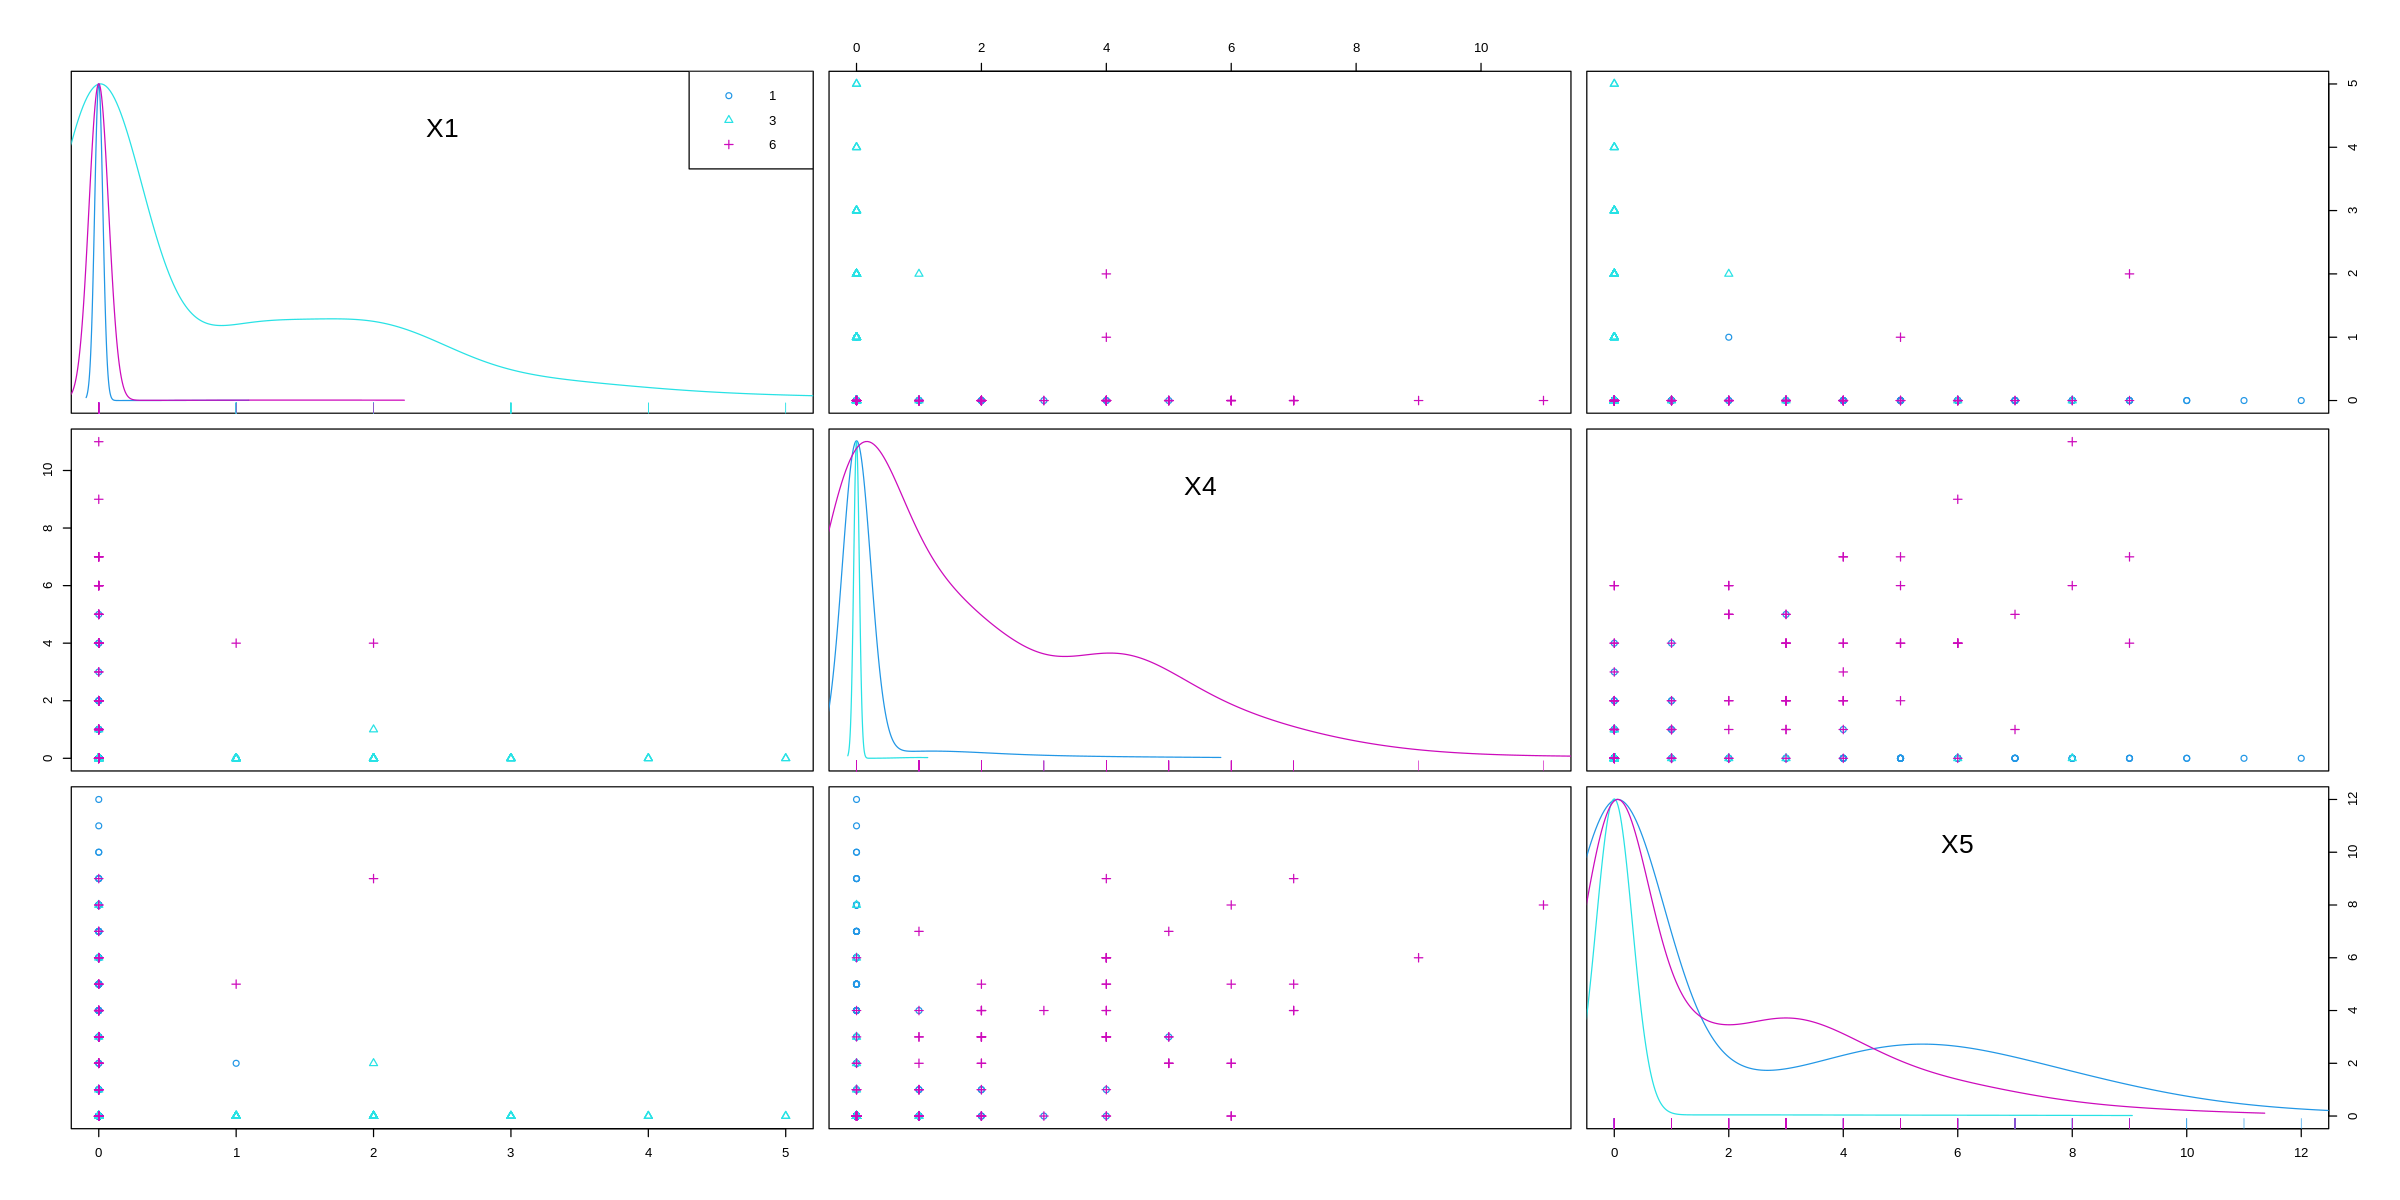

In [31]:
options(repr.plot.width = 20, repr.plot.height = 10)
scatterplotMatrix(
  ~X1 + X4 + X5 | y,  # Mark groups on y by color and shape
  data = test,
  regLine = FALSE,    # No regression line
  smooth  = FALSE,    # No smoother
  col = 4:6           # Colors 4-6 from `carPalette`
)


In [19]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [20]:
fit<-lda(y~.,data=train,tol=0.0001)

In [21]:
fit

Call:
lda(y ~ ., data = train, tol = 1e-04)

Prior probabilities of groups:
        1         3         6 
0.3267327 0.3428218 0.3304455 

Group means:
          X1       X6       X15       X12     X1.1      X0.1       X0.2
1 0.01893939 2.340909  8.996212 11.170455 5.939394 0.6136364 0.00000000
3 0.77256318 8.494585 13.841155 13.256318 5.646209 0.7833935 0.05776173
6 0.00000000 2.131086 10.801498  7.973783 1.134831 0.0000000 0.00000000
         X7       X16      X6.1      X6.2        X10     X0.4       X0.5
1 0.1856061  4.715909 12.500000 14.909091  9.4393939 1.045455 0.00000000
3 4.3176895 13.133574  9.198556 11.801444 10.7075812 1.801444 0.05415162
6 0.1985019  8.116105 13.580524  5.505618  0.8426966 0.000000 0.00000000
        X0.6       X8     X16.1        X2      X0.7         X11      X2.1
1 0.02272727 1.409091  8.140152 14.719697 14.992424 8.333333333 0.6325758
3 0.00000000 1.805054  3.523466  3.115523 11.555957 9.097472924 0.7906137
6 0.00000000 1.093633 12.719101  8.666667  0.5

In [23]:
train_pred<-fit%>%predict(train)

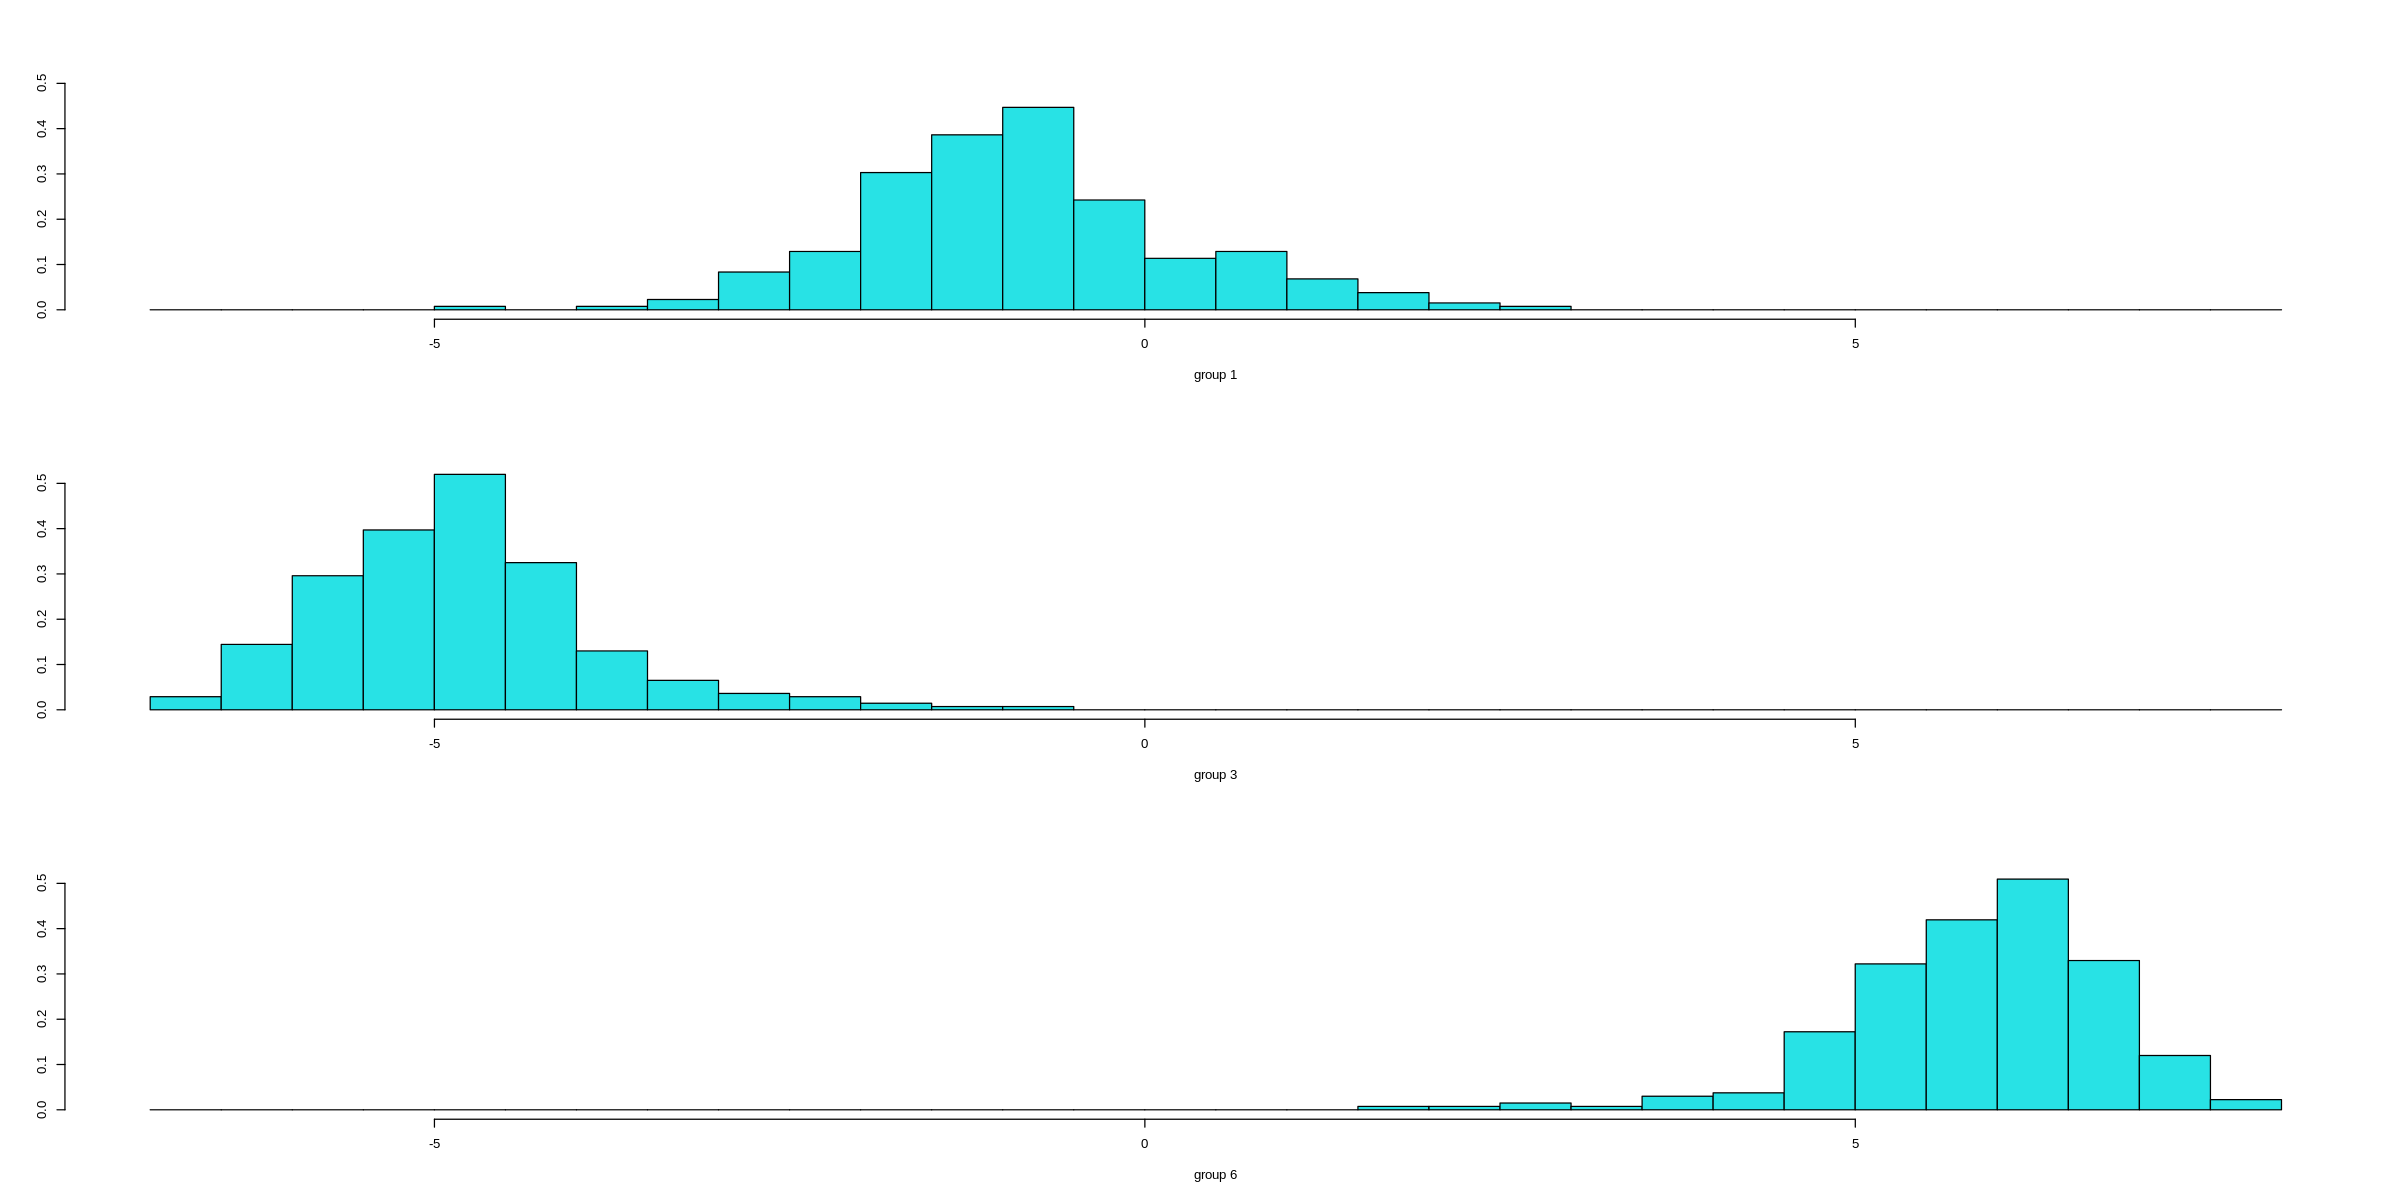

In [30]:
options(repr.plot.width = 20, repr.plot.height = 10)
ldahist(train_pred$x[,1],g=train$y)

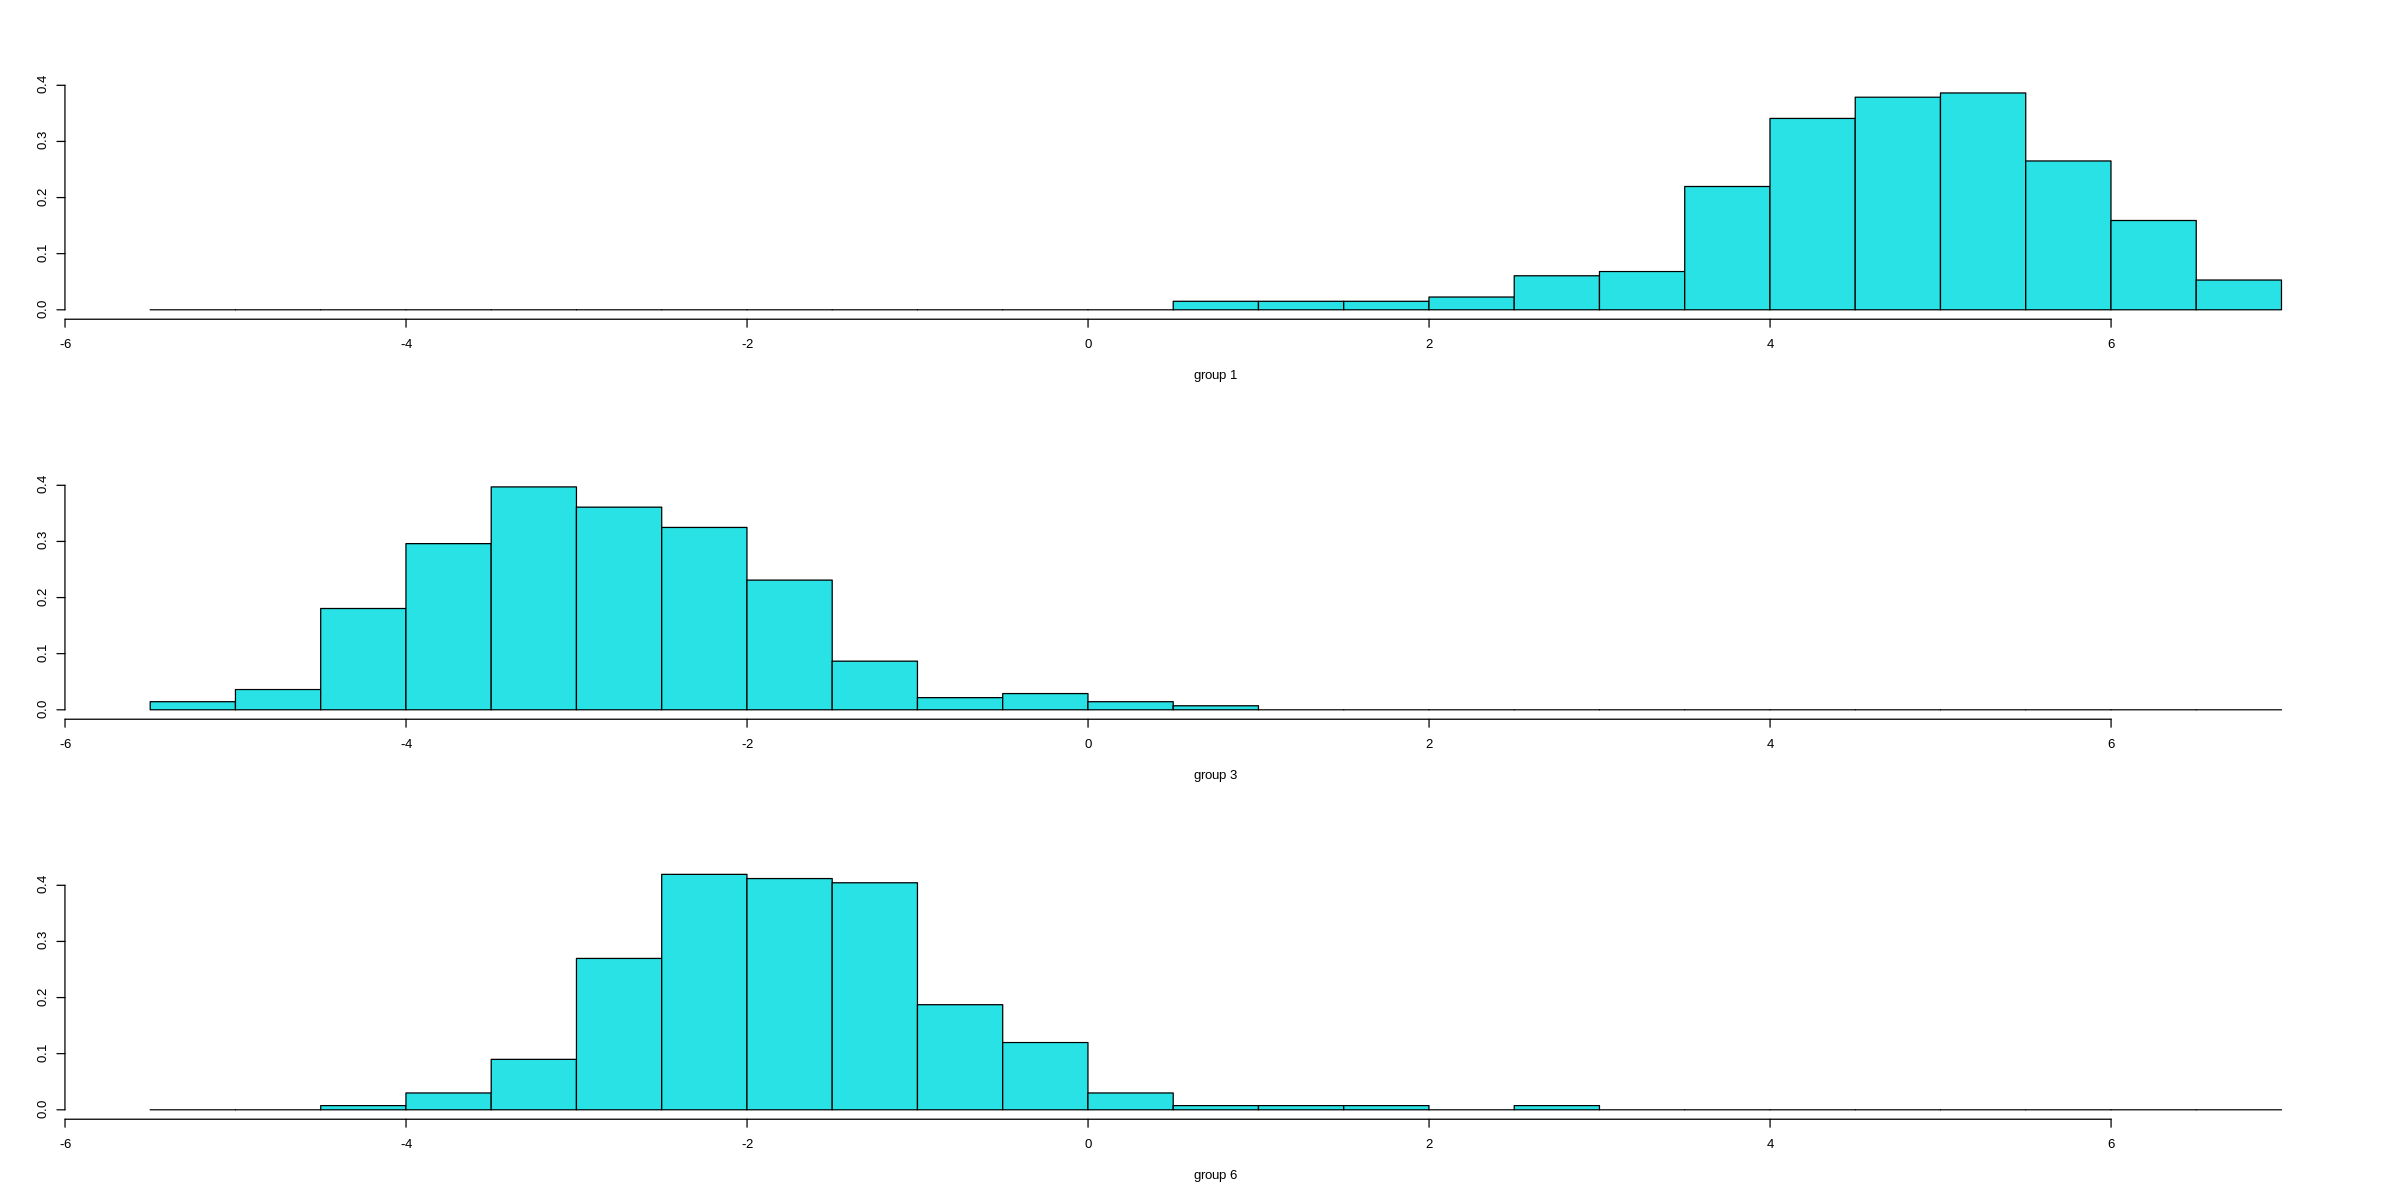

In [29]:
options(repr.plot.width = 20, repr.plot.height = 10)

# Plot LDA histogram for the 2nd discriminant
ldahist(data = train_pred$x[, 2], g = train$y)

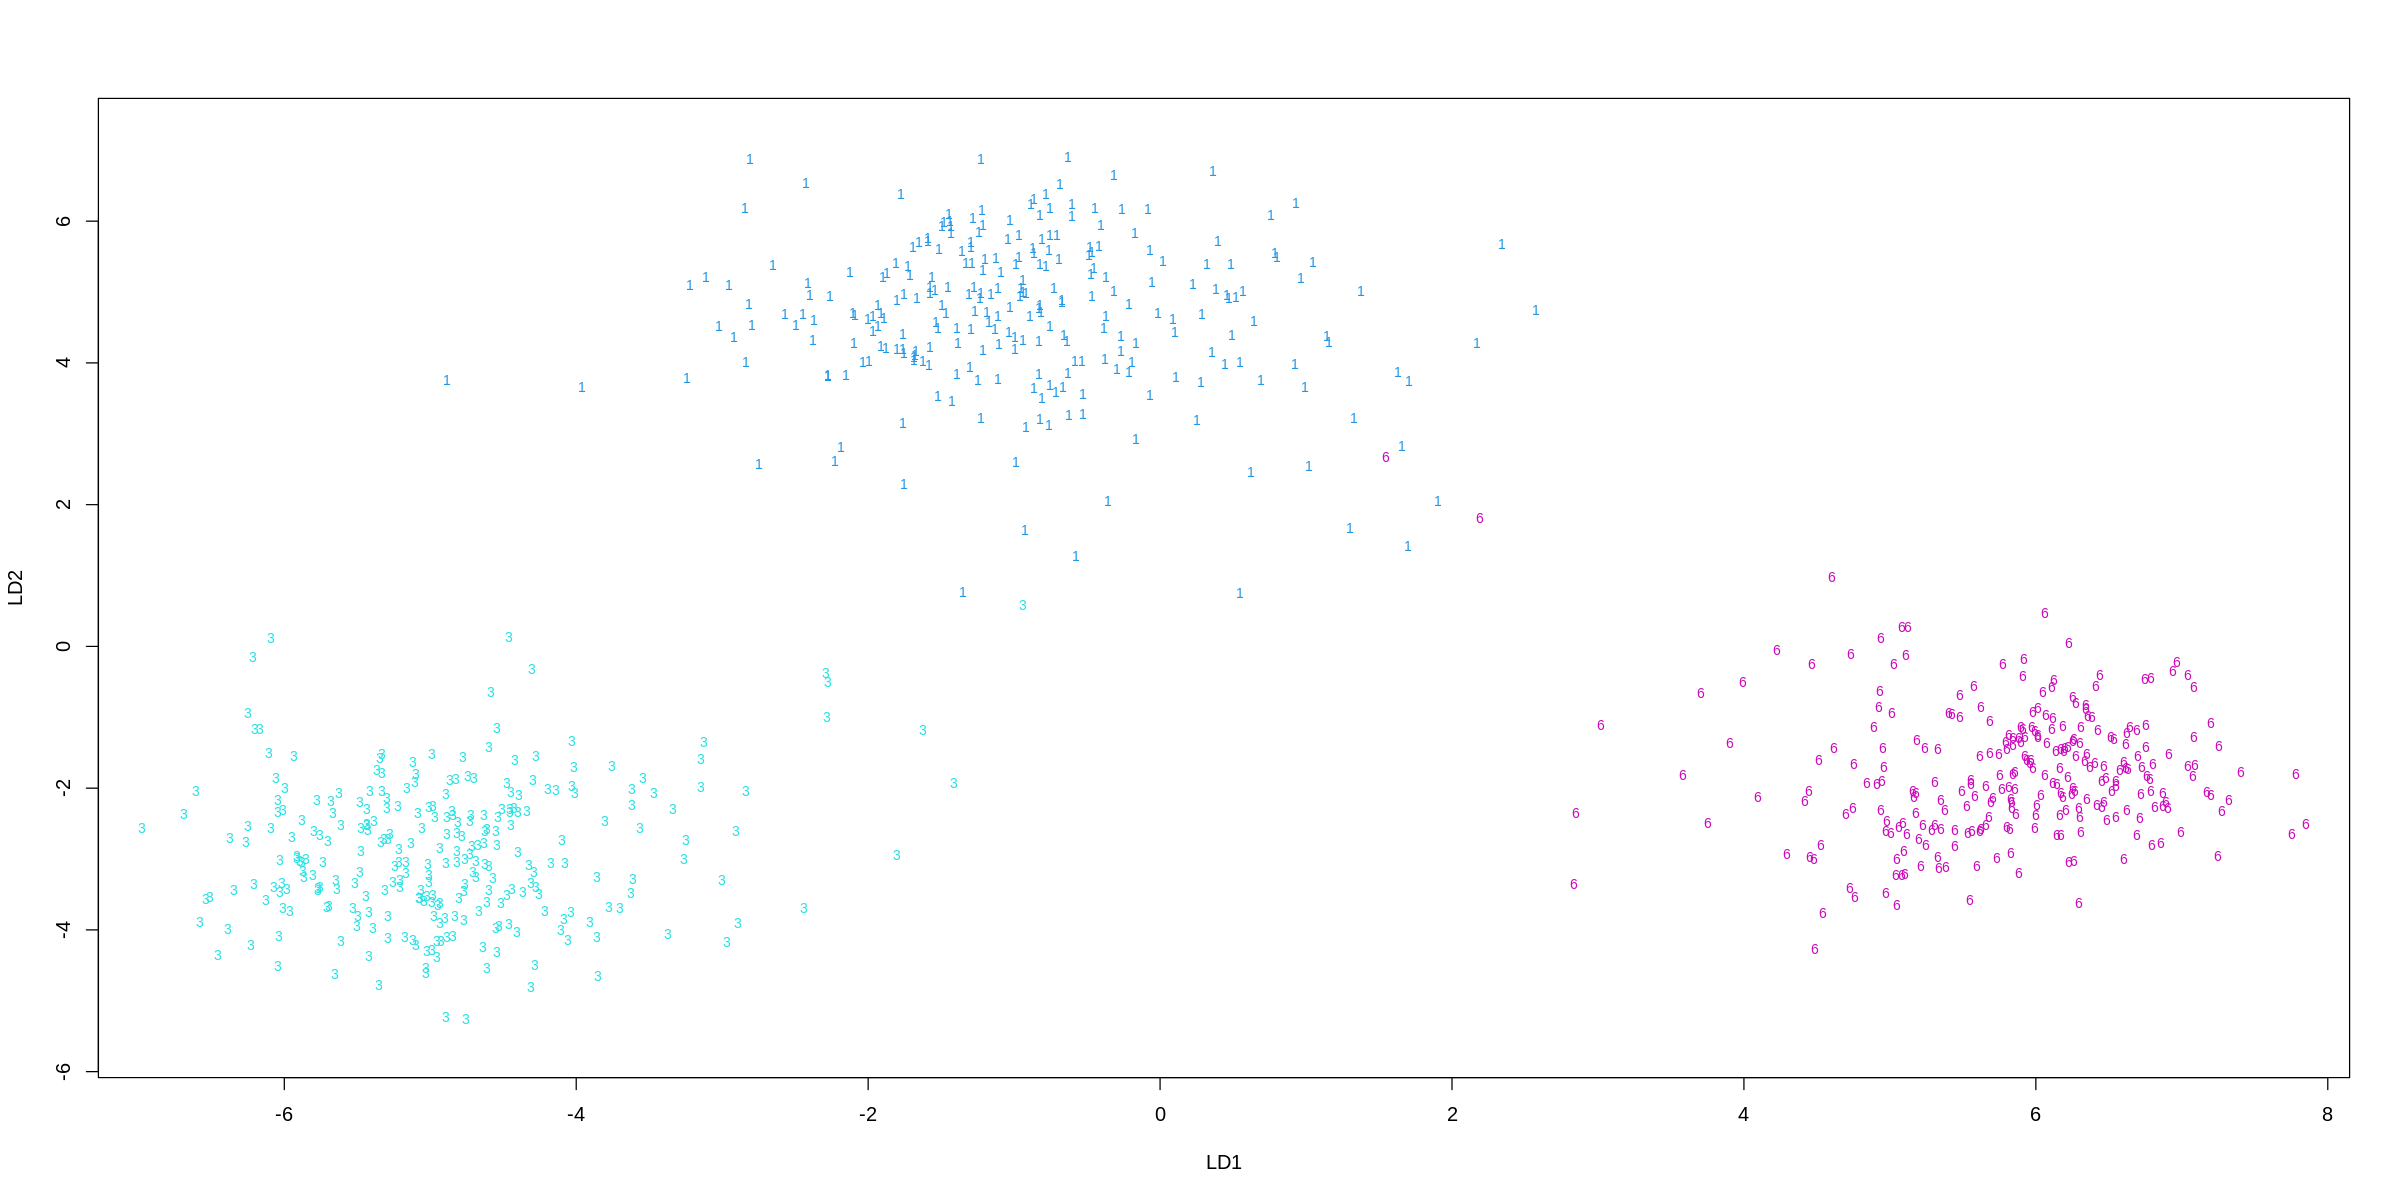

In [34]:
# Plot the train points for all classes, colored by `y`
fit %>% plot(col = (4:6)[train$y])


In [36]:

# Predict on test data using model generated in train phase
pred <- fit %>% predict(test)
pred %>% names()

[1] "class"     "posterior" "x"

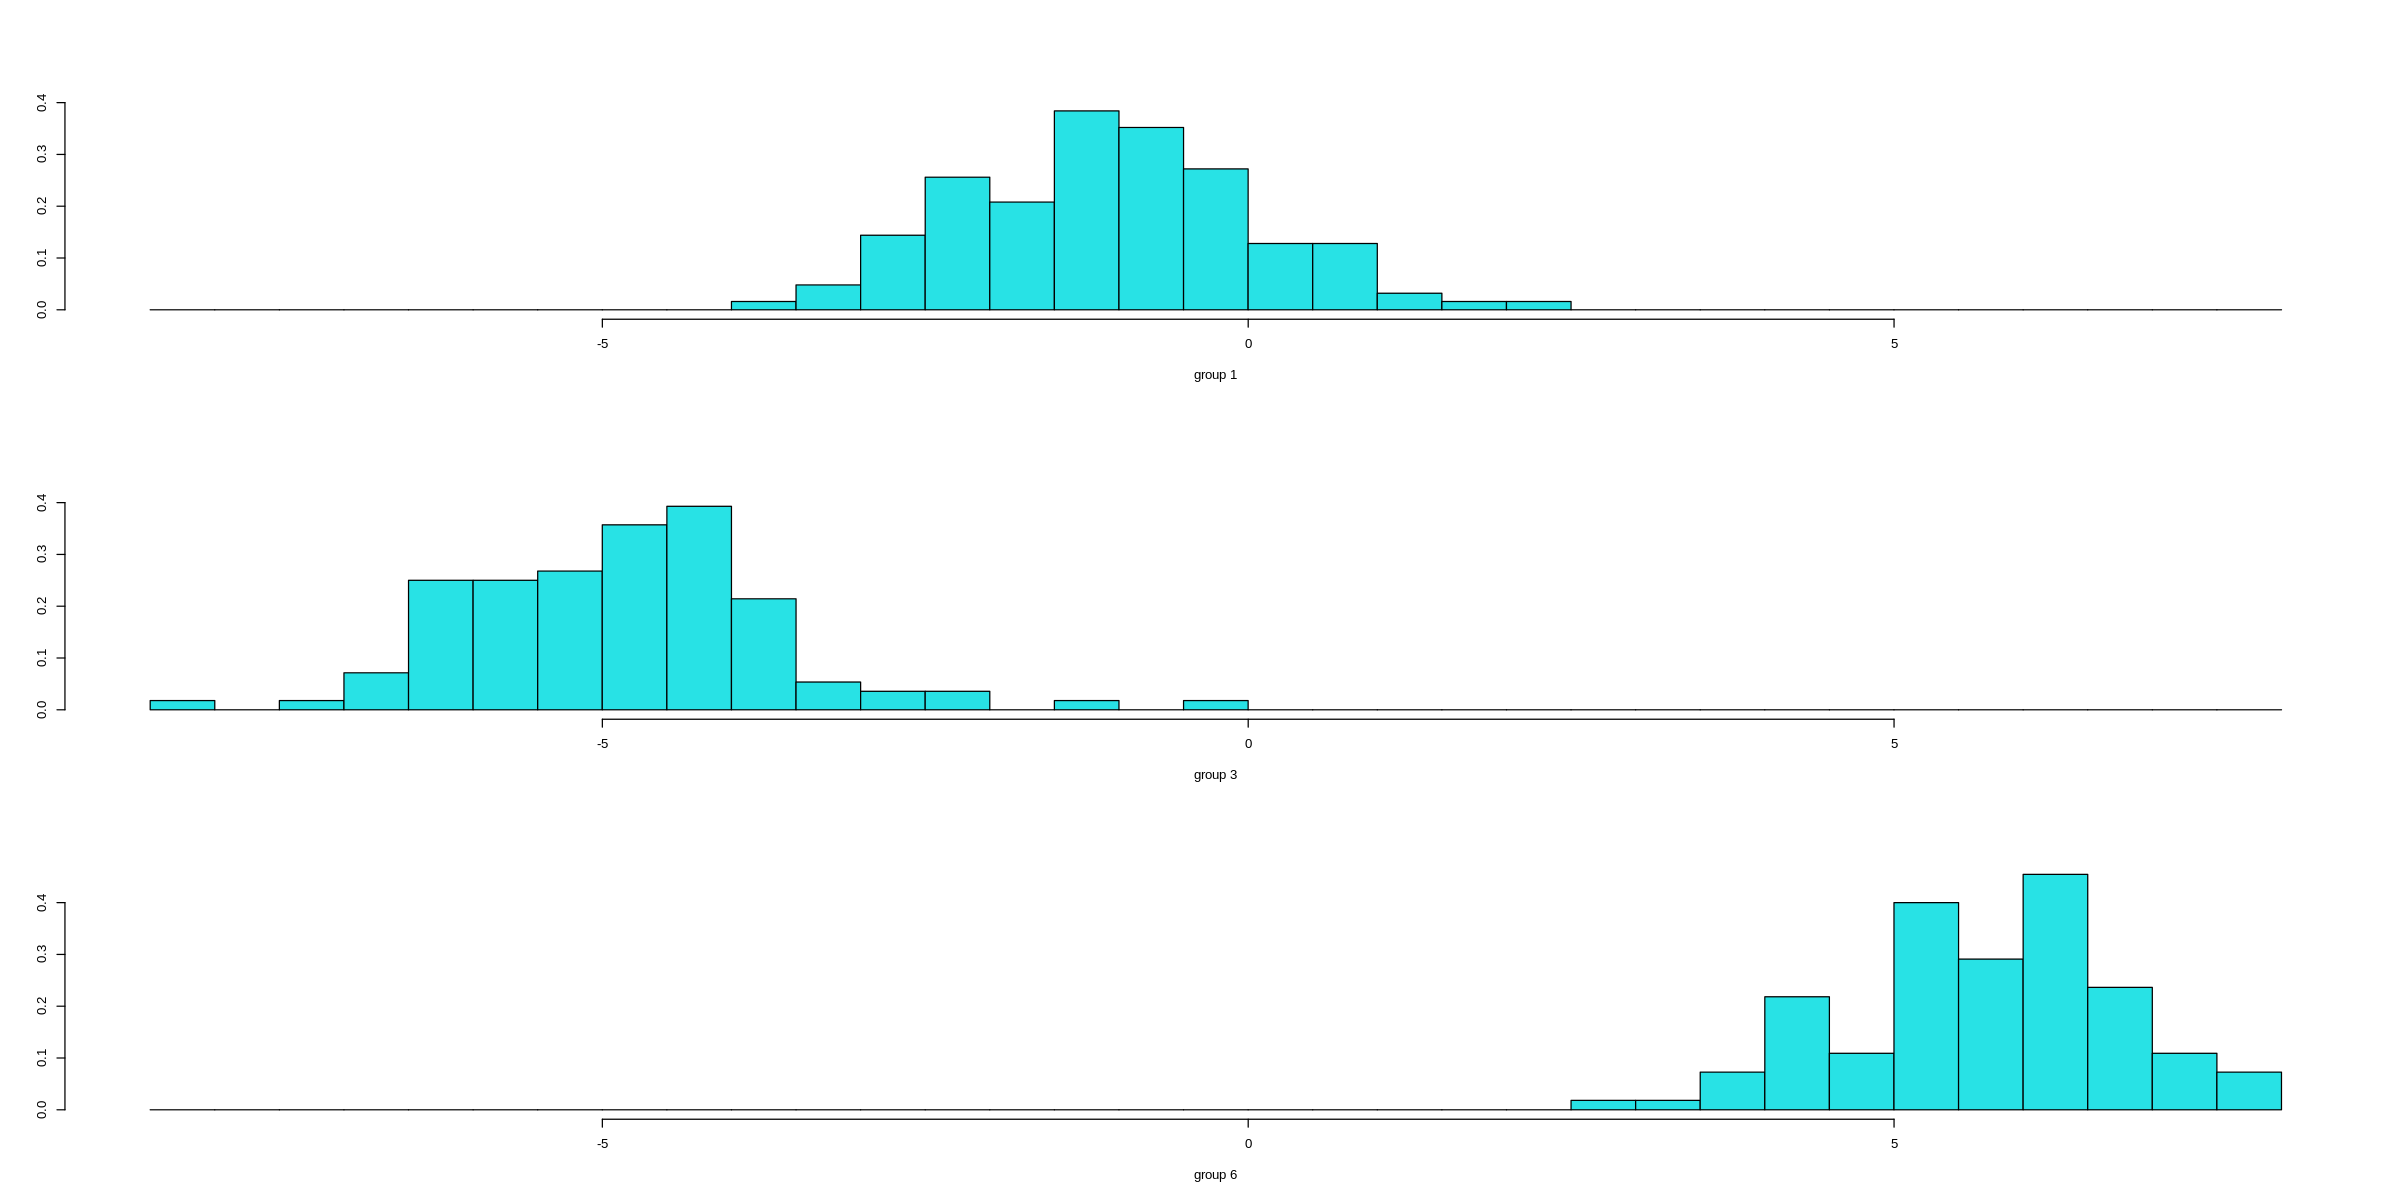

In [37]:
ldahist(pred$x[,1],g=test$y)

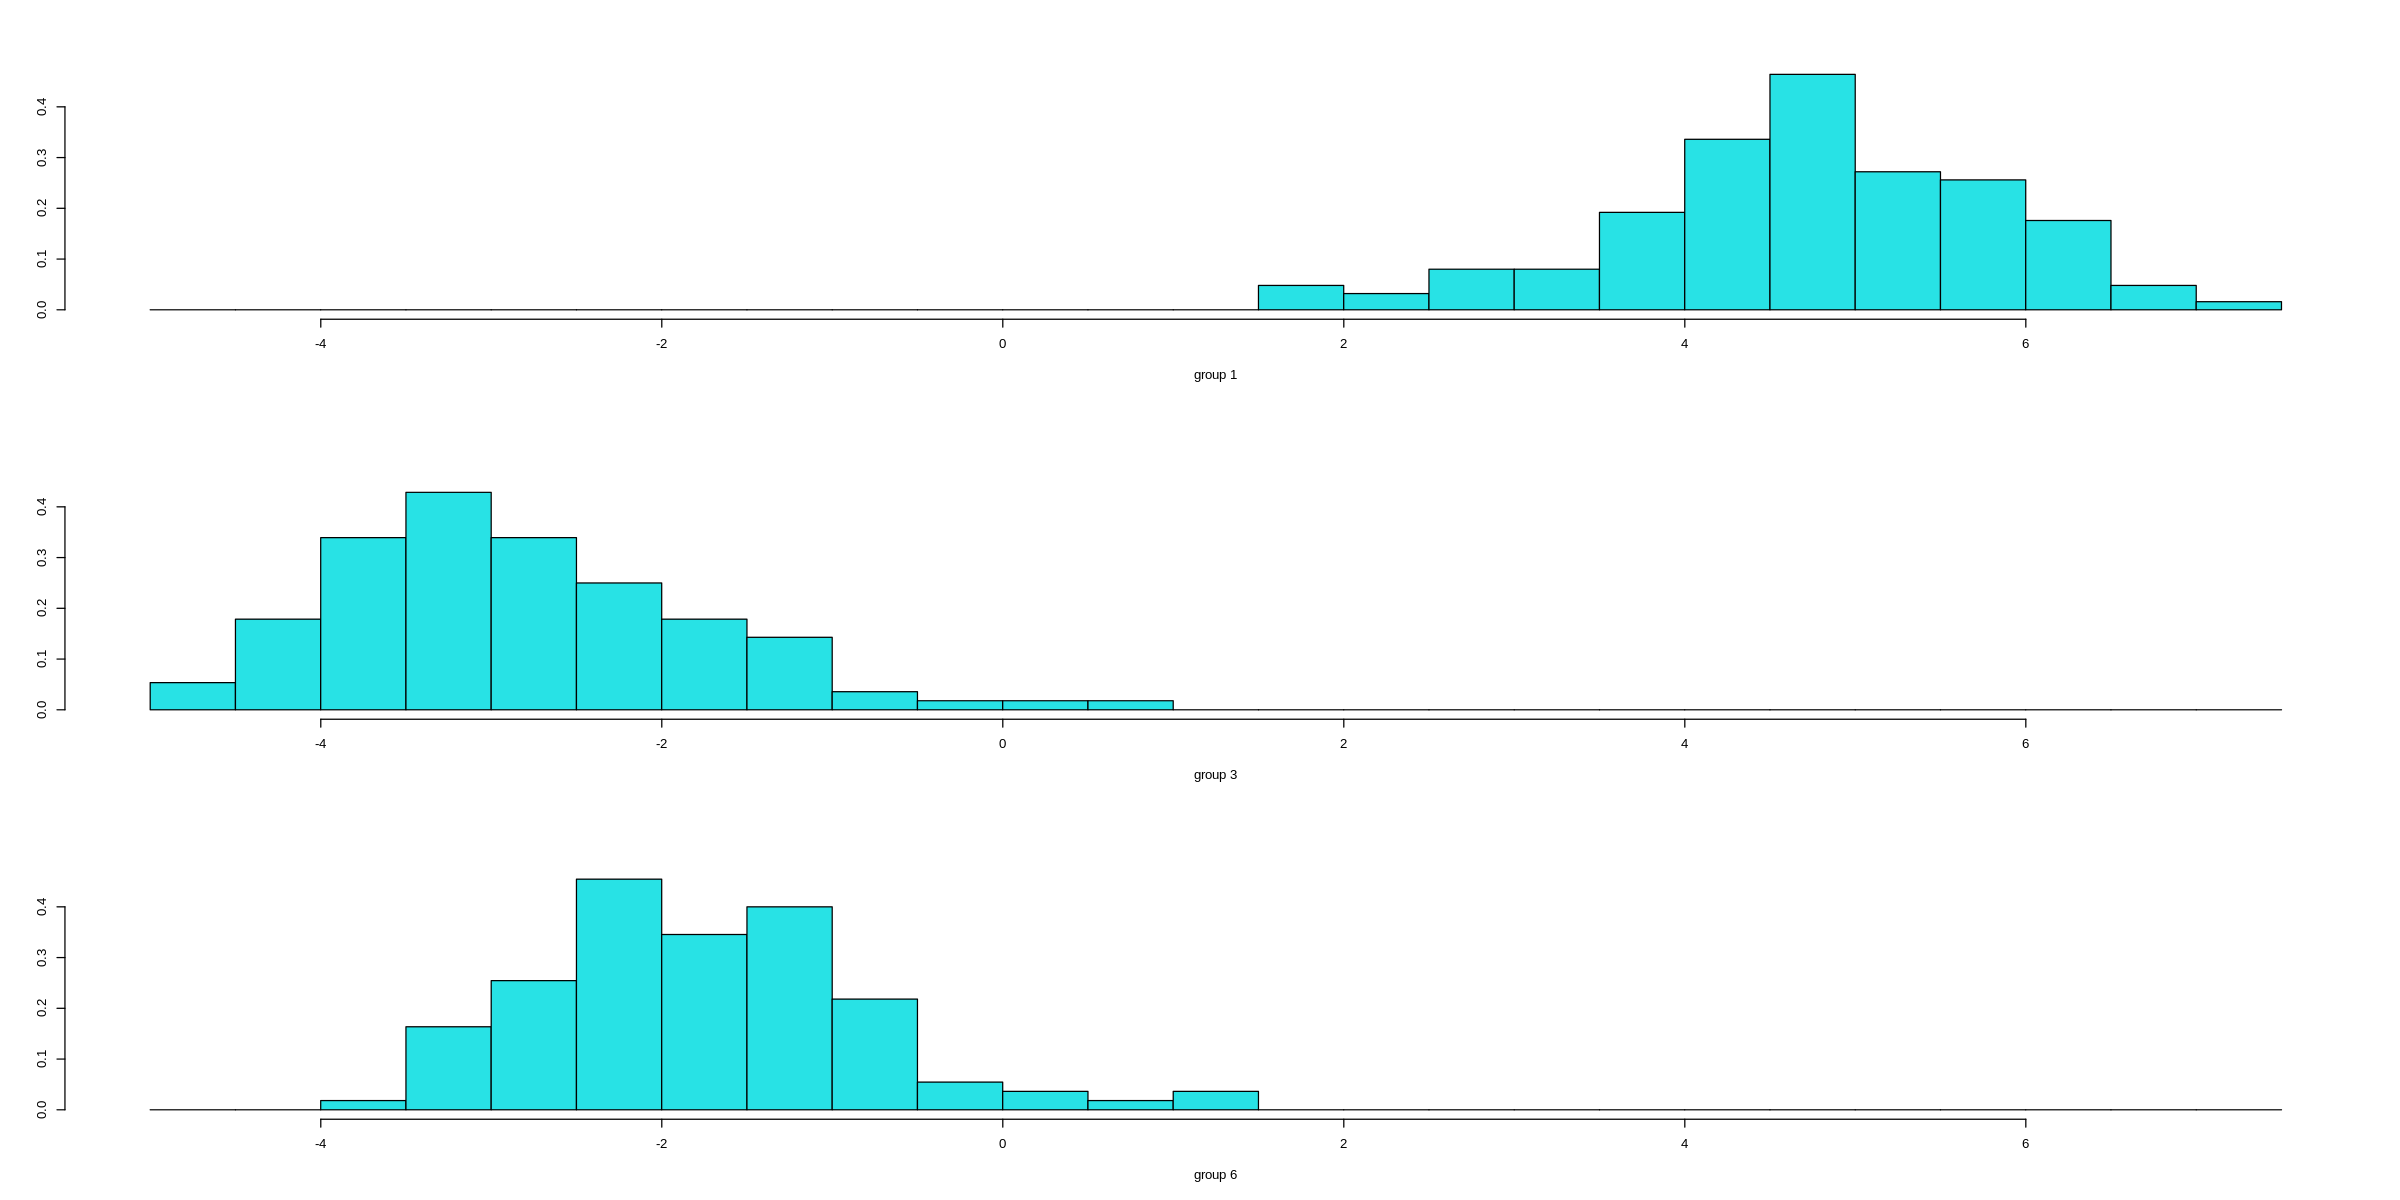

In [38]:
ldahist(
  pred$x[, 2],  # Get `x` from `pred`, use second column
  g = test$y
)

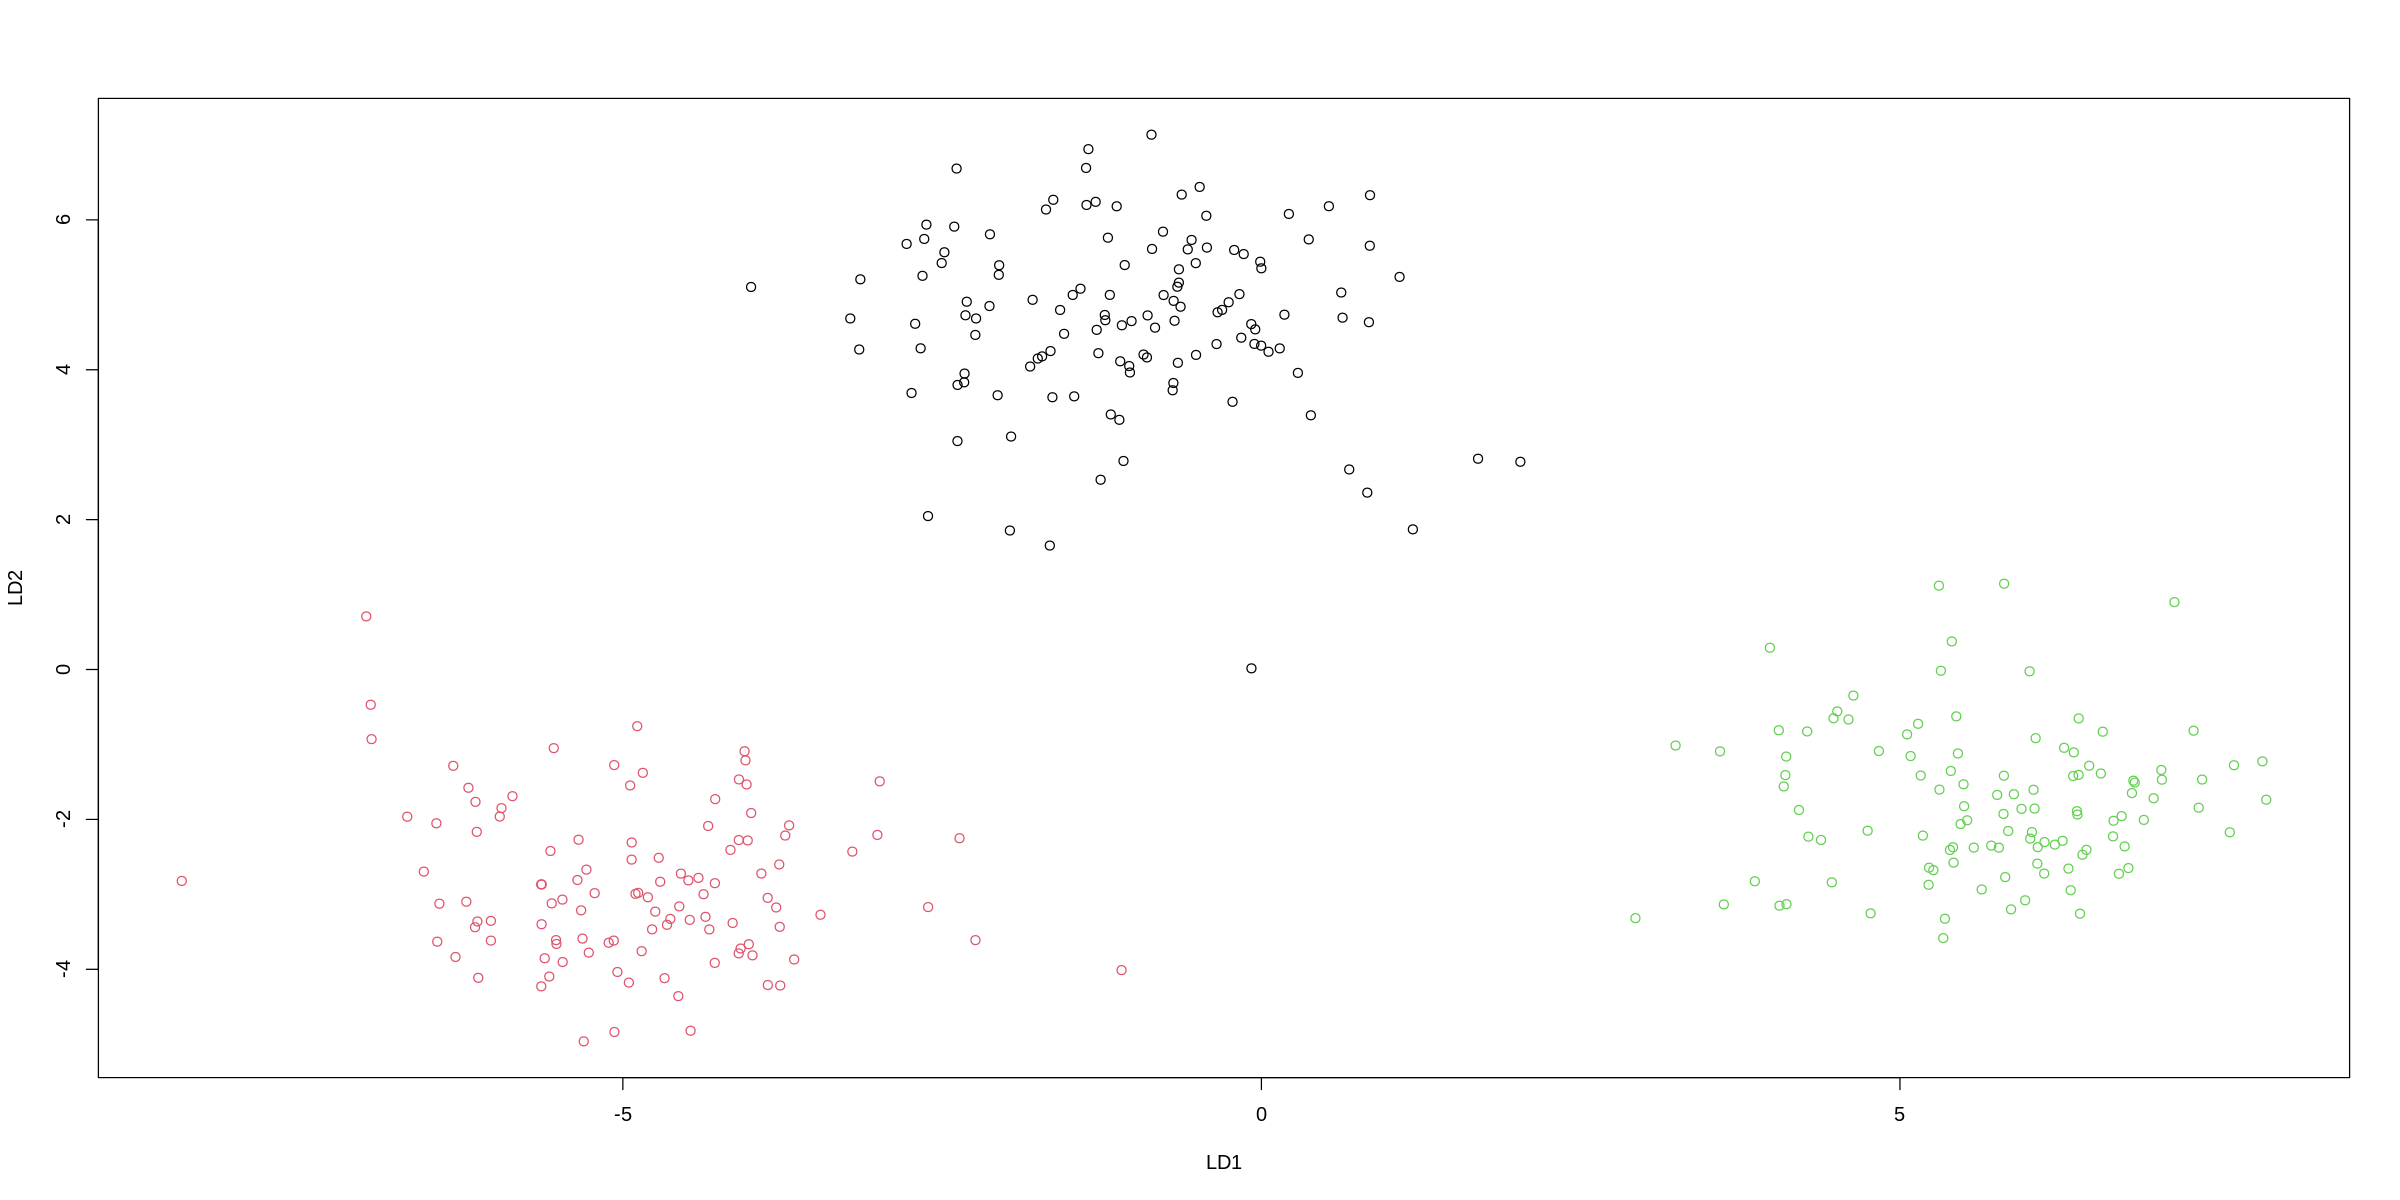

In [39]:
# Plot of projected data onto LD1 and LD2, colored according
# to the class labels
pred$x %>% plot(col = pred$class)

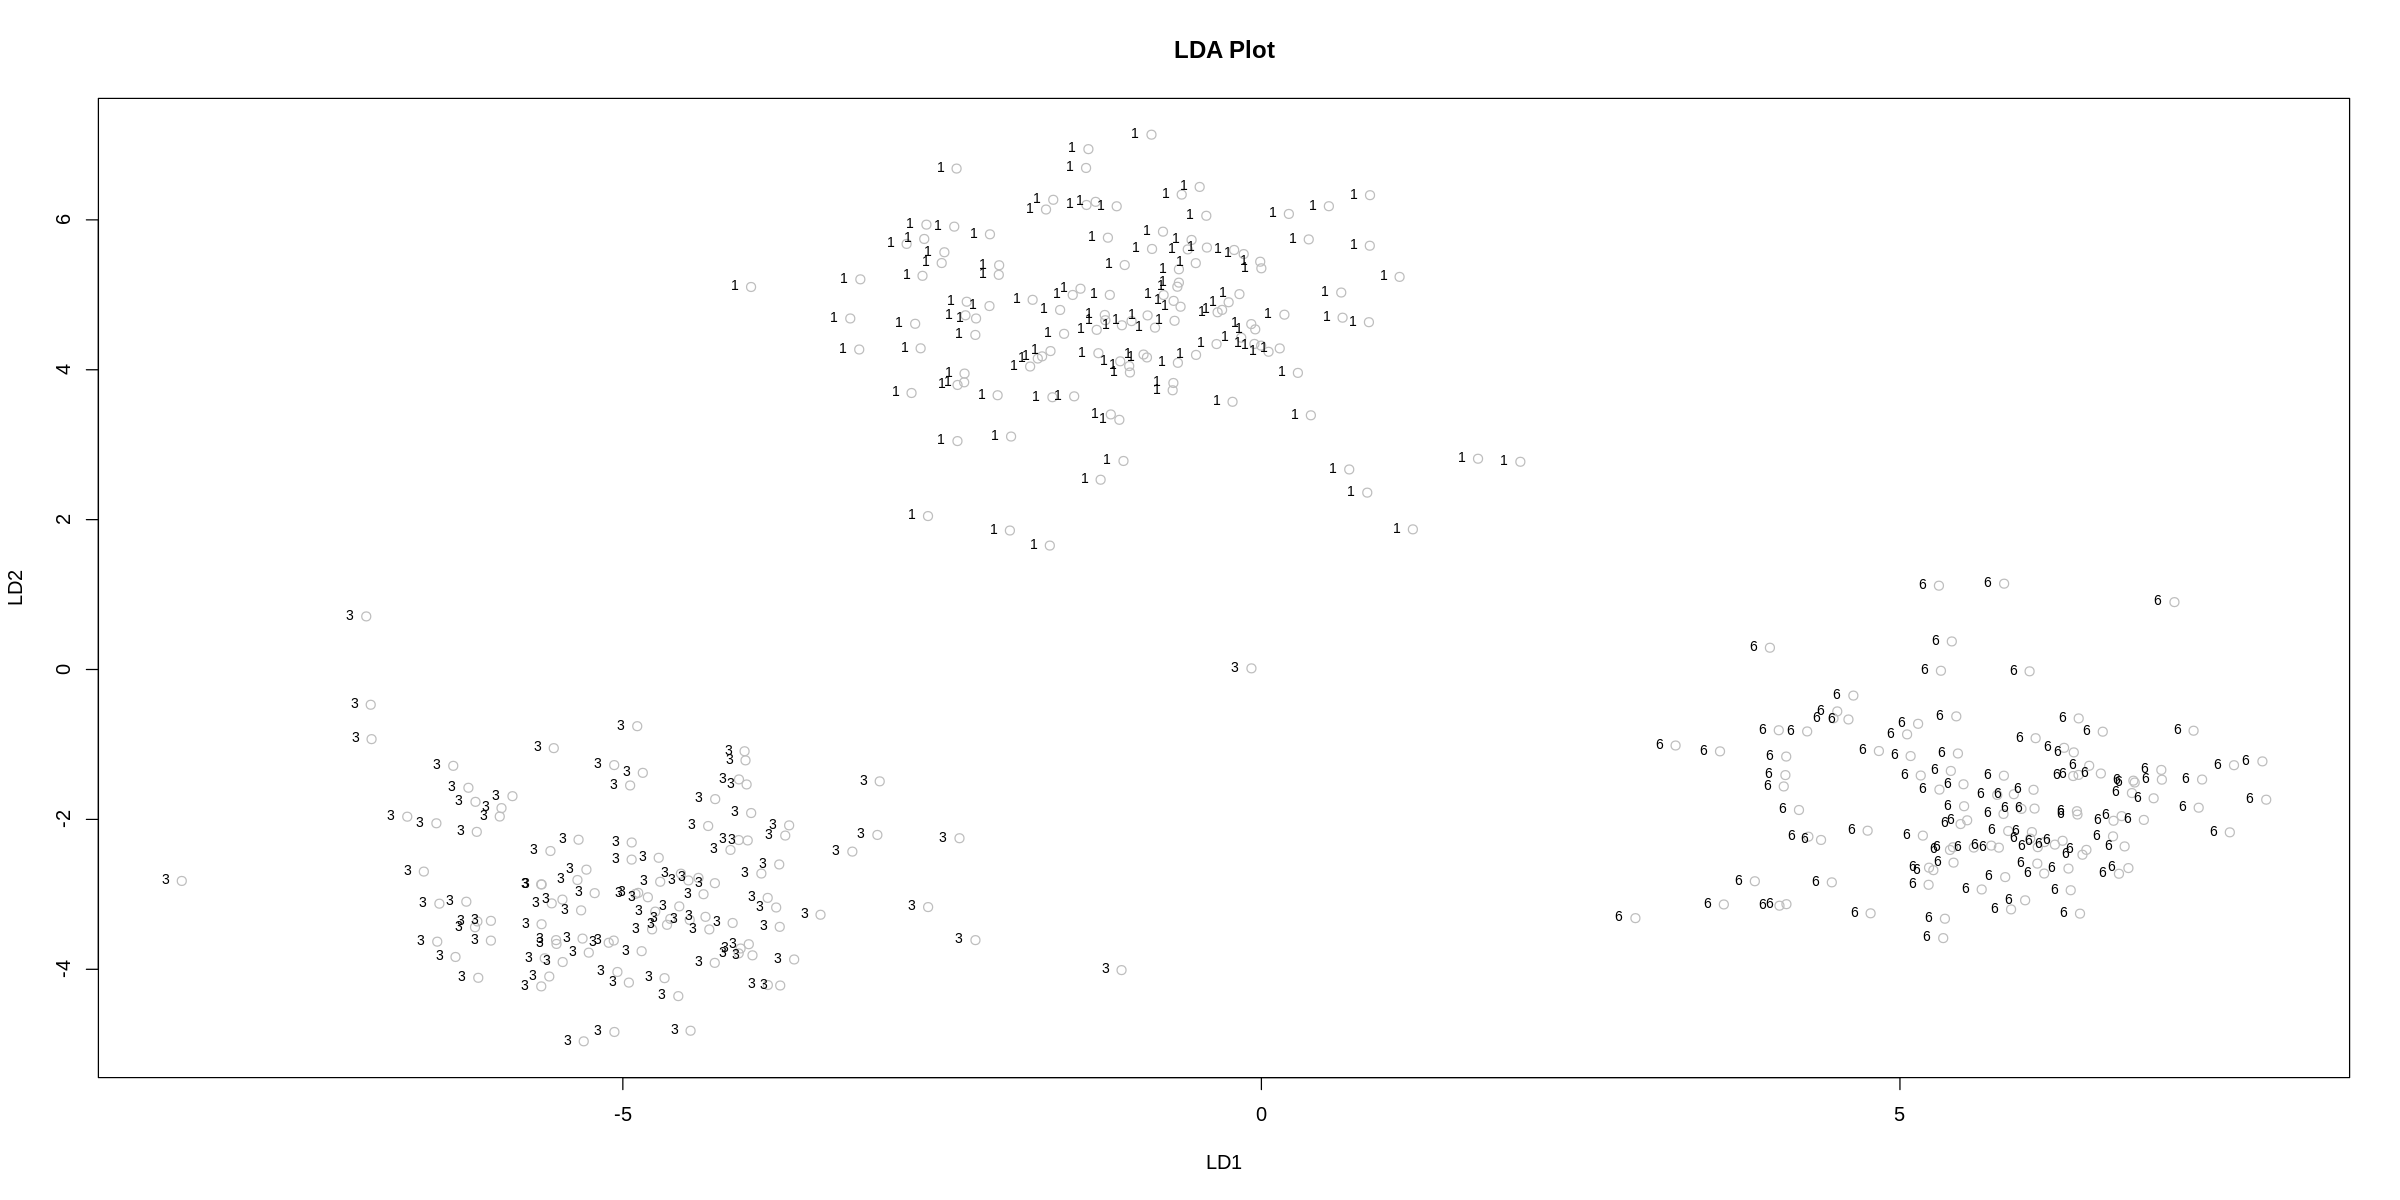

In [42]:
# Let's assume you want to plot the first two discriminants from LDA
plot(pred$x[, 1:2], col = "gray", main = "LDA Plot", xlab = "LD1", ylab = "LD2")

# Now add text labels (y values from test set)
text(pred$x[, 1:2], labels = test$y, pos = 2, cex = 0.7)


In [46]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [47]:
# Accuracy of model on test data
table(
  actualclass = test$y,         # True outcome
  predictedclass = pred$class  # Predicted outcome
) %>%
confusionMatrix() %>%          # Accuracy statistics
print()

Confusion Matrix and Statistics

           predictedclass
actualclass   1   3   6
          1 125   0   0
          3   1 111   0
          6   0   0 110

Overall Statistics
                                         
               Accuracy : 0.9971         
                 95% CI : (0.984, 0.9999)
    No Information Rate : 0.3631         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9957         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 3 Class: 6
Sensitivity            0.9921   1.0000    1.000
Specificity            1.0000   0.9958    1.000
Pos Pred Value         1.0000   0.9911    1.000
Neg Pred Value         0.9955   1.0000    1.000
Prevalence             0.3631   0.3199    0.317
Detection Rate         0.3602   0.3199    0.317
Detection Prevalence   0.3602   0.3228    0.317
Balanced Accuracy      0.9960   0.9979  